In this **worksheet** we will try to simulated two integrate and fire neurons. Most of the code will be supplied to you, but you will be asked to fill in some gaps and to look at what happens when some parameters are changed.

----


We want to look at two neurons, but lets start with one. First we need to remind ourselves how to plot things! In this code we will load the ploting library and plot the function "v=sin(t)". This uses two libraries, the first "numpy" contains lots of stuff that is useful for mathematics, for example, the definition of sine. Here the library is imported and given the short name "np". Next two objects are defined, `t` and `v`. `t` first: `np.linspace(0,10,1000)` makes a big list of times starting at 0 and ending at 10 with a 1000 points in between. For `v` it makes another big list it makes by taking each t value and applying sine to it.

After that there is lots of plotting stuff, the basic command is plot that plots t against v, the rest does stuff like setting the size, 6 inches by 4 inches, absurdly matplotlib the plotting library uses inches.

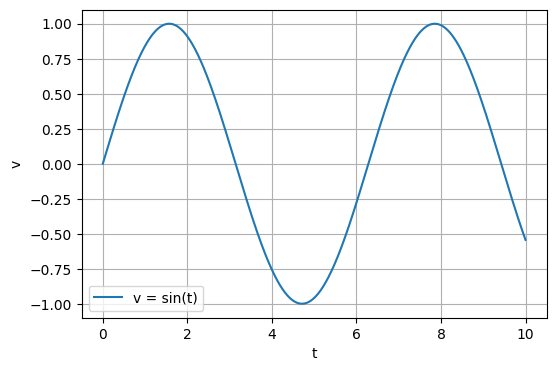

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time range from 0 to 10
t = np.linspace(0, 10, 1000)

# Define the function v = sin(t)
v = np.sin(t)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(t, v, label='v = sin(t)')
plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()

Run this code and try making some changes; for example change sine to cosine and make it span 0 to 20 instead of 0 to 10.

----

Now lets do some numberical solving of the differential equation; in Python there are, of course, libraries for solving differential equations. When there are libraries available, you should try to use them, using a library usual results in faster and more efficient code and code which is easier for other people to use. However, here, we will solve the differential equation by implementing the Euler appoximation ourselves; this is for two reasons, the main one is educational, so you can see what is happening, the other is practical, the reset that will form part of the integrate and fire neuron, is complicated to implement using a library.

----

Numerical integration means solving a differential equation approximately by advancing forwards in time in little steps, we are going to use _delta_ to refer to that little step in time, it is sort of traditional.

The idea is simple, imagine you are on your bike at position _x_ and going at speed _v_, in a little time step delta your position will be approximately _x+delta v_, you will have travelled _delta * v_  in the time _delta_. It is approximately since it leaves out any accelleration, _v_ might be changing.

Now the idea is to keep approximating your position this way, this approx is called the Euler approximation, after the mathematician Euler who did many important things and has a lot of mathematical things named after him. There are other, more accurate, approaches to numerical integration, but Euler integration is the simplest.
____

Lets look at doing numerical integation for the differential equation _df/dt=-f_. Say at some starting time, which we take to be _t=0_ for convenience, we know the value of _f_, it is _f(0)_, now in the Euler approximation we guess

_f(delta)=f(0)+df/dt*delta=(1-delta) f(0)_

and

_f(2delta)=f(delta)+df/dt*delta= f(delta)-f(delta)*delta=(1-delta)f(delta)=(1-delta)*f(0)_

and so on, the important point is that you can work out each new value from the previous one. This would obviously get very tedious by hand but it's easy enough using a computer.
____



This code integrates the equation *df/dt = -f* for different values of *f*. Thing carefully about what the loop is doing! `f[t_index]` gives the `t_index`th entry in the list `f`, where zero is the first entry, this would correspond to the value of the function after `t_index` time steps, that is the value of the function at `t_index`_*delta_. The loop doesn't do anything to the first entry but all the other ones it replaces using the formula `f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])` which corresponds to the Euler approximation.

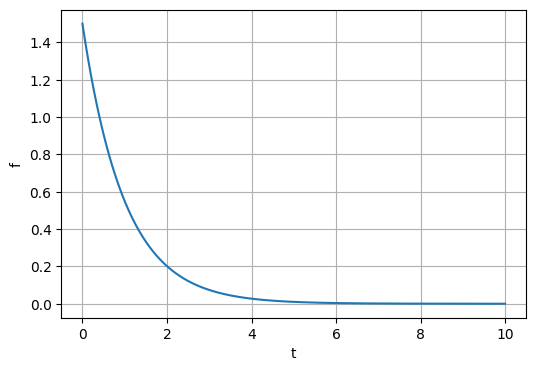

In [3]:
def dfdt(f):
  return -f

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()



The `f = np.full_like(t, f0)` just makes a list the same size as the `t` list but with the value `f0` for each entry.
____

In fact it is possible to write down the solution to _df/dt=-f_, it is

_f=f(0)_ exp _(-t)_

where the "exp" is the exponential, a well known mathematical function, in this code we compare the Euler approximation to the true function, in fact, the approximation is too good for _df/dt=-f_ for the error to be visible, so we look at _df/dt=f_ instead, this has

_f=f(0)_ exp _(t)_

as solution. The number of points has been decreased, making delta bigger, you can experiment with changing this.

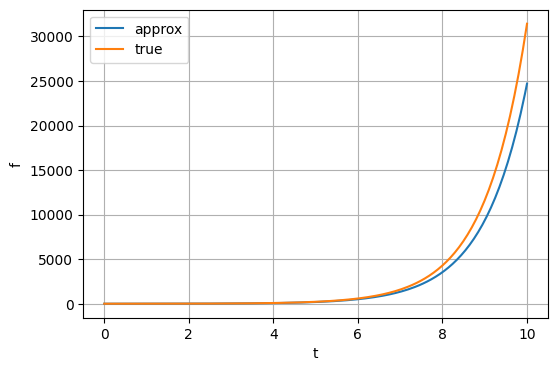

In [ ]:
def dfdt(f):
  return f

t_start=0.0
t_end=10.0
n_points=200
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f_approx = np.full_like(t, f0)
f_true=np.full_like(t,f0)

for t_index in range(1,n_points):
  f_approx[t_index]=f_approx[t_index-1]+delta*dfdt(f_approx[t_index-1])
  f_true[t_index]=f_true[0]*np.exp(t_index*delta)

plt.figure(figsize=(6, 4))
plt.plot(t, f_approx,label="approx")
plt.plot(t, f_true,label="true")
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.grid(True)
plt.show()

_____
Next going back to the code without the exact solution, change it so that the differential equation is *df/dt = 10-f*

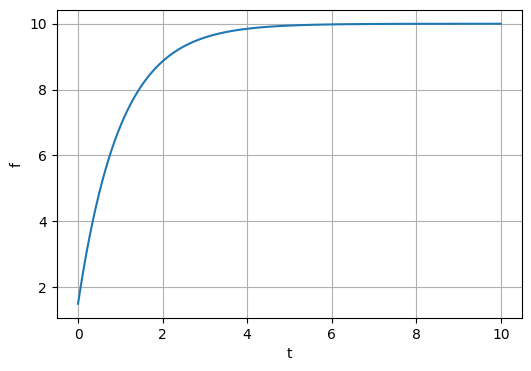

In [4]:
def dfdt(f):
  return 10-f

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

Now we want a `if` statement. To give the syntax look at this:

In [ ]:
f=10
print(f)
if f>5:
  f=0
print(f)

10
0


Lets add an if statement so that whenever `f` exceeds `threshold=5.0` it resets to 1.5. We will repeat some parts of the code needlessly, the notebook does remember stuff from earlier cells, but it is nice to keep it all together.

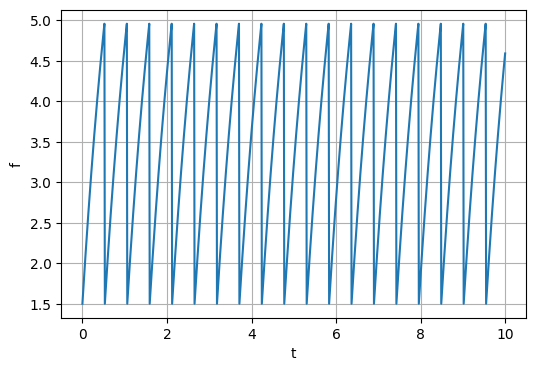

In [5]:
def dfdt(f):
    return 10.0-f

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)
threshold=5.0 # note that I've added this

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])
  if f[t_index]>threshold:
    f[t_index]=f0

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

Next we want to start setting up a neuronal simulator. Lets reproduce the figure in the notes. First lets set some values, when you are writing code it is useful to avoid "hard coding", that is writing numbers directly into the code, it can make it difficult to change values later. We are going to be simulating the differential equation tau dv/dt = el + ri - v where we are using el for the leak, ri for the input including the resistance and tau for the timescale. I will add that and you should take the code for *df/dt=1-f* above and adopt it to do the integrate and fire equation.

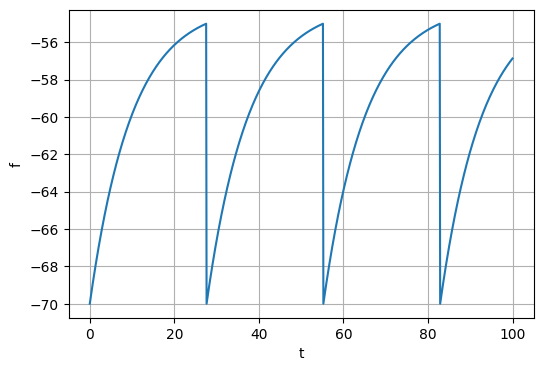

In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

el = -70  # mV, resting potential
vt = -55  # mV, threshold voltage
tau = 10  # ms, membrane time constant
#ri = 12  # mV, different values of R_m * I_e
ri = 16

t_start=0.0
t_end=100.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
v0 = el
v=np.full_like(t, v0)

def dvdt(v, ri, el, tau):
    return (el+ri-v)/tau

for t_index in range(1,n_points):
  v[t_index]=v[t_index-1]+delta*dvdt(v[t_index-1],ri,el,tau)
  if v[t_index]>vt:
    v[t_index]=v0

plt.figure(figsize=(6, 4))
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()




You should try changing the ri value to 16 as well.
_____

Finally lets try and do two neurons in one graph, I am going to show you how to do it for the simpler example above, the one with the *f*. Here I am going to make a list called `all_f` which contains two `f`'s, each will have its own value of tau so we are solving the equation *tau df/dt=10-f* for two values of *tau*. The list `all_f` will hold both `f`s, so it will be a list of lists.

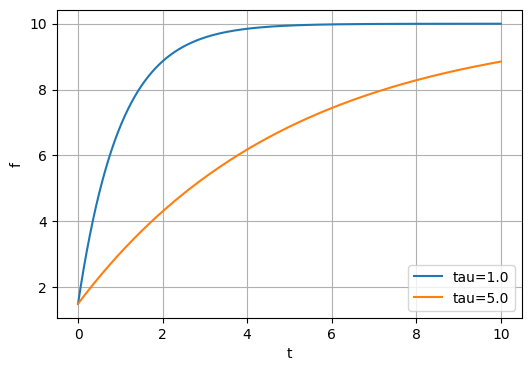

In [ ]:
def dfdt(f,tau):
  return (10-f)/tau

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
all_tau = [1.0,5.0]
all_f = [np.full_like(t, f0),np.full_like(t, f0)]

for t_index in range(1,n_points):
  for f_index in range(len(all_f)):
    f=all_f[f_index]
    tau=all_tau[f_index]
    f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1],tau)

plt.figure(figsize=(6, 4))
plt.plot(t, all_f[0],label="tau=1.0")
plt.plot(t, all_f[1],label="tau=5.0")
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.grid(True)
plt.show()

Now do the same thing, but for two neurons, one with `ri=12` and the other `ri=16`

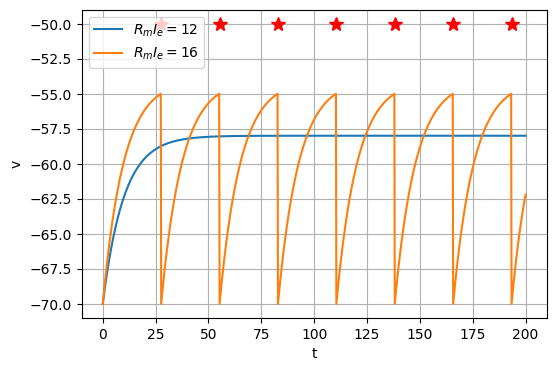

In [26]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

el = -70  # mV, resting potential
vt = -55  # mV, threshold voltage
tau = 10  # ms, membrane time constant
all_ri = [12,16]  # mV, different values of R_m * I_e

t_start=0.0
t_end=200.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
v0 = el

neuron_n=len(all_ri)
v=[np.full_like(t, v0) for _ in range(0,neuron_n)]

def dvdt(v, ri, el, tau):
    return (el+ri-v)/tau

reset_times = []

for t_index in range(1,n_points):
  for neuron_index in range(0,neuron_n):
    v[neuron_index][t_index]=v[neuron_index][t_index-1]+delta*dvdt(v[neuron_index][t_index-1],all_ri[neuron_index],el,tau)
    if v[neuron_index][t_index]>vt:
      v[neuron_index][t_index]=v0
      reset_times.append(t[t_index])

plt.figure(figsize=(6, 4))
for neuron_index in range(0,neuron_n):
  ri=all_ri[neuron_index]
  label=r"$R_mI_e={}$".format(ri) #don't worry too much about this, the "r" infront of the string is for the fancy formatting
  plt.plot(t, v[neuron_index],label=label)
for reset_time in reset_times:
    plt.plot(reset_time, -50, 'r*', markersize=10)

plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.grid(True)
plt.show()


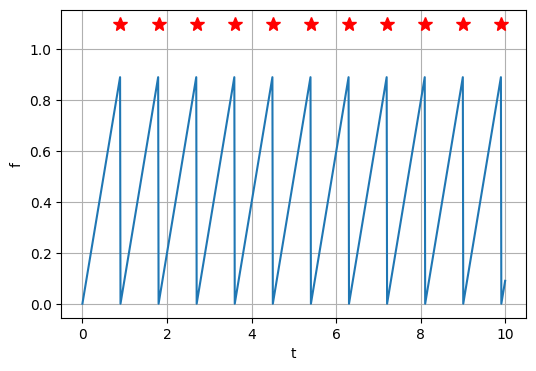

In [ ]:
t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 0.0
threshold=0.9
f = np.full_like(t, f0)

reset_times=[]

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta
  if f[t_index]>threshold:
    f[t_index]=f0
    reset_times.append(t_index*delta)


plt.figure(figsize=(6, 4))
plt.plot(t, f)

for reset_time in reset_times:
    plt.plot(reset_time, 1.1, 'r*', markersize=10)

plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

As a final nicety, in the figure in the notes there is a star every where there is a spike, in this code I show how this might be done, in my code there is just a line that climbs but resets whenever it reaches f=0.9. You can go back to the code above to add the stars at each spike. Note the `foo.append(val)` command appends `val` to the list `foo`.

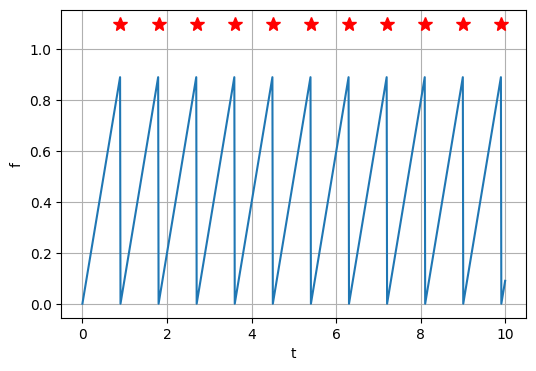

In [ ]:
t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 0.0
threshold=0.9
f = np.full_like(t, f0)

reset_times=[]

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta
  if f[t_index]>threshold:
    f[t_index]=f0
    reset_times.append(t_index*delta)


plt.figure(figsize=(6, 4))
plt.plot(t, f)

for reset_time in reset_times:
    plt.plot(reset_time, 1.1, 'r*', markersize=10)

plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()